In [ ]:
## esse programa foi copiado do site: https://phelipetls.github.io/web-scraping-de-paginas-dinamicas

from time import sleep
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import pandas as pd

class ReclameAqui:

    base_url = "https://www.reclameaqui.com.br/empresa/"

    def __init__(self, driver, empresa):
        self.driver = driver
        self.empresa = empresa

    def extrair_informacoes(self, n_paginas):
        url = self.base_url + self.empresa + "/lista-reclamacoes/?pagina="
        self.reclamacoes, self.titulos, self.links = [], [], []

        for i in range(1, n_paginas + 1):
            self.driver.get(url + str(i+10))
            sleep(3)
            html = bs(self.driver.page_source, "html.parser")

            reclamacoes_html = html.find_all("p", {"class": "text-detail"})
            reclamacoes_na_pagina = [reclamacao.text.split("|") for reclamacao in reclamacoes_html]
            self.reclamacoes.extend(reclamacoes_na_pagina)

            titulos_e_links = html.find_all("a", {"class": "link-complain-id-complains"})
            self.titulos.extend([titulo.text.strip() for titulo in titulos_e_links])
            self.links.extend([link.get("href") for link in titulos_e_links])

    def extrair_descricoes(self):
        urls = [self.base_url + link[1:] for link in self.links]
        self.descricoes = []
        for url in urls:
            self.driver.get(url)
            sleep(3)
            html = bs(self.driver.page_source, "html.parser")
            descricao = html.find("div", {"class": "complain-body"}).text.strip()
            self.descricoes.append(descricao)

In [23]:
globo_url = "americanas-com-loja-online"
globo = ReclameAqui(webdriver.Firefox(), globo_url)
# esses métodos extraem o status, título e link
# e há quanto tempo foi feita a reclamação,
# mais a cidade do reclamante.
# todas são armazenadas como atributos da classe:
globo.extrair_informacoes(2) # 10 é o número das páginas
globo.extrair_descricoes()

# juntando tudo em um dataframe:

globo_df = pd.concat(
    [
        pd.DataFrame(globo.reclamacoes, columns=["status", "periodo", "cidade"]),
        pd.Series(globo.descricoes, name="descricao"),
        pd.Series(globo.titulos, name="titulo"),
    ],
    axis="columns",
)

# limpando os campos que vêm com espaços supérfluos dos lados
colunas_com_espaco = ["status", "periodo", "cidade"]
globo_df.loc[:, colunas_com_espaco] = globo_df.loc[:, colunas_com_espaco].apply(lambda x: x.str.strip())

In [25]:
globo_df.tail()


,status,periodo,cidade,descricao,titulo
15,Não respondida,Há 3 horas,São Paulo,Fiz um pedido dia 17 no site das americanas e ...,Sem nota fiscal
16,Não respondida,Há 3 horas,Salvador,"Prezados,Estou sendo, neste exato momento, vít...",[Editado pelo Reclame Aqui] - AMERICANAS - TEN...
17,Não respondida,Há 3 horas,Recife,Mercadoria foi enviada divergenteComprei o cel...,Mercadoria recebida diferente da comprada
18,Não respondida,Há 3 horas,São Paulo,Efetuei compra pelo site com retirada em uma l...,Produto ruim e demora no atendimento
19,Não respondida,Há 3 horas,Guarulhos,"Em março comprei a cômoda london, em abril rec...",Cômoda faltando peças.


In [9]:
globo_df.to_csv("dadosame.csv")

In [10]:
palavras = globo_df.descricao.str.lower().str.replace("[!?:;.,]", "").str.split()

palavras

0     [efetuei, a, compra, de, um, celular, moto, g7...
1     [comprei, um, porta, canetas, o, qual, deveria...
2     [comprei, o, fogão, à, vista, no, cartão, créd...
3     [fiz, um, pedido, na, loja, americanas, prazo,...
4     [fiz, um, pedido, no, site, da, americanas, em...
5     [comprei, um, relógio, smartwatcch, mas, veio,...
6     [realizei, uma, de, um, robo, aspirador, mondi...
7     [boa, noite, fiz, uma, compra, nas, lojas, a, ...
8     [boa, noite, estou, tentando, cancelar, pelo, ...
9     [no, dia, 03/05/2020, fiz, no, site, das, loja...
10    [comprei, o, painel, para, tv, 32polegadas, pe...
11    [fiz, um, pedido, de, 2, cadeiras, pretas, em,...
12    [efetuei, uma, compra, no, dia, 16/04/2020, no...
13    [fiz, um, pedido, no, site, das, americanas, c...
14    [comprei, dia, 16, de, abril, e, não, recebi, ...
15    [no, site, informam, que, os, produtos, seriam...
16    [comprei, uma, mochila, no, site, americanas, ...
17    [fiz, o, pedido, de, uma, boneca, no, site

In [11]:
globo_df = globo_df.assign(palavras = palavras).explode("palavras")

globo_df.head()

,status,periodo,cidade,descricao,titulo,palavras
0,Não respondida,Há 18 minutos,São Paulo,Efetuei a compra de um celular Moto G7 Plus pe...,NÃO RECEBO MEU PEDIDO,efetuei
0,Não respondida,Há 18 minutos,São Paulo,Efetuei a compra de um celular Moto G7 Plus pe...,NÃO RECEBO MEU PEDIDO,a
0,Não respondida,Há 18 minutos,São Paulo,Efetuei a compra de um celular Moto G7 Plus pe...,NÃO RECEBO MEU PEDIDO,compra
0,Não respondida,Há 18 minutos,São Paulo,Efetuei a compra de um celular Moto G7 Plus pe...,NÃO RECEBO MEU PEDIDO,de
0,Não respondida,Há 18 minutos,São Paulo,Efetuei a compra de um celular Moto G7 Plus pe...,NÃO RECEBO MEU PEDIDO,um


In [12]:
#! pip install nltk

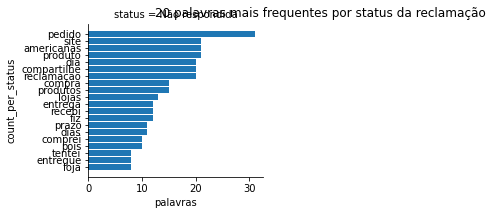

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

globo_df = globo_df.query('palavras not in @stopwords.words("portuguese")')

globo_df['count_per_status'] = globo_df.groupby(['palavras', 'status']).palavras.transform('size')

fct = globo_df\
    .groupby(["status"], as_index=False)\
    .apply(lambda x: x.drop_duplicates("palavras").nlargest(20, "count_per_status"))[::-1]\
    .pipe((sns.FacetGrid, "data"), col="status", hue="status", sharey=False, col_wrap=3)

fct.map(plt.barh, "palavras", "count_per_status")

plt.subplots_adjust(top=0.9)

plt.suptitle("20 palavras mais frequentes por status da reclamação")

plt.show()

In [14]:
import networkx as nx

# criando tabela de correlações entre pares de palavras
# que aparecem no mínimo 15 vezes no total

correlations = (
    globo_df.palavras.reset_index()
    .assign(total_count=lambda x: x.groupby("palavras").palavras.transform("size"))
    .query("total_count >= 5")
    .drop(columns="total_count")
    .pivot_table(index="index", columns="palavras", aggfunc=lambda x: 1, fill_value=0)
    .corr()
    .unstack()
    .rename_axis(["item1", "item2"])
    .reset_index(name="correlation")
    .query("correlation != 1")
    .sort_values("correlation", ascending=False)
)

correlations.head(10)

,item1,item2,correlation
1402,lojas,aguardo,0.881917
128,aguardo,lojas,0.881917
1476,nao,ja,0.793492
1329,ja,nao,0.793492
43,3,resposta,0.727607
2150,resposta,3,0.727607
314,atendimento,consigo,0.687500
706,consigo,atendimento,0.687500
309,atendimento,cartão,0.687500
709,consigo,cartão,0.687500


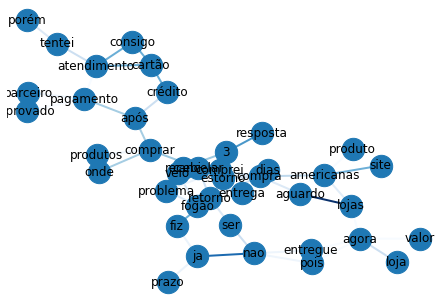

In [15]:
# criando grafo a partir do dataframe
G = nx.from_pandas_edgelist(correlations.head(100), "item1", "item2", "correlation")

# pesos dos vértices (no caso, as correlações)
weights = (
    pd.DataFrame(G.edges, columns=["item1", "item2"])
    .merge(correlations, on=["item1", "item2"])
    .correlation.values
)

# visualizar os nós e vértices separados
# de acordo com o algoritmo de Kamada & Kawai
nx.draw_kamada_kawai(
    G, with_labels=True, edge_color=weights, width=2, edge_cmap=plt.cm.Blues, node_size=500
)

plt.show()

In [16]:
# lendo o arquivo do lexicon
lexicon = pd.read_fwf(
    "~/SentiLex-PT02/SentiLex-flex-PT02.txt", header=None
)

lexicon

,0
0,"à-vontade,à-vontade.PoS=N;FLEX=ms;TG=HUM:N0;PO..."
1,"abafada,abafado.PoS=Adj;FLEX=fs;TG=HUM:N0;POL:..."
2,"abafadas,abafado.PoS=Adj;FLEX=fp;TG=HUM:N0;POL..."
3,"abafado,abafado.PoS=Adj;FLEX=ms;TG=HUM:N0;POL:..."
4,"abafados,abafado.PoS=Adj;FLEX=mp;TG=HUM:N0;POL..."
...,...
82342,"zotes,zote.PoS=Adj;FLEX=fp|mp;TG=HUM:N0;POL:N0..."
82343,"zumbidor,zumbidor.PoS=Adj;FLEX=ms;TG=HUM:N0;PO..."
82344,"zumbidora,zumbidor.PoS=Adj;FLEX=fs;TG=HUM:N0;P..."
82345,"zumbidoras,zumbidor.PoS=Adj;FLEX=fp;TG=HUM:N0;..."


In [17]:
# dando nome à coluna
lexicon.columns = ["palavras"]

# extraindo cada palavras e sua polaridade/sentimento
# o padrão ?P<X> serve para dar nome ao grupo
lexicon = lexicon.palavras.str.extract(
    r"(?P<palavras>[\w\-, ]+)\..*POL:N0=(?P<polaridade>-?\d)"
)

In [18]:
# separando cada palavra
lexicon = lexicon.assign(palavras = lexicon.palavras.str.split(",")).explode("palavras")

lexicon.to_csv("Sentilex-PT-FLEX.csv")

In [19]:
globo_palavras = globo_df.merge(lexicon, how="left", on="palavras")
globo_palavras.isna().mean()

status              0.000000
periodo             0.000000
cidade              0.000000
descricao           0.000000
titulo              0.000000
palavras            0.000000
count_per_status    0.000000
polaridade          0.775545
dtype: float64

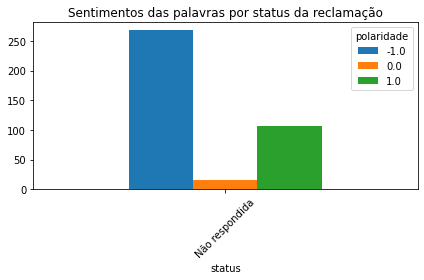

In [20]:
globo_palavras["polaridade"] = globo_palavras.polaridade.astype("float64")

(
    globo_palavras.groupby(["status", "polaridade"])
    .size()
    .unstack()
    .plot.bar(
        rot=45,
        title="Sentimentos das palavras por status da reclamação",
    )
)

plt.tight_layout()
plt.show()

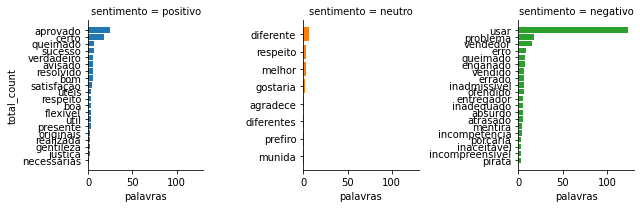

In [21]:
import numpy as np

globo_palavras["sentimento"] = np.select(
    [
        globo_palavras.polaridade == 1,
        globo_palavras.polaridade == 0,
        globo_palavras.polaridade == -1,
    ],
    ["positivo", "neutro", "negativo"],
    default = "ausente"
)

fct = \
    globo_palavras.query('sentimento != "ausente"')\
    .assign(total_count=lambda x: x.groupby("palavras").palavras.transform("size"))\
    .groupby("sentimento")[["palavras", "total_count"]]\
    .apply(lambda x: x.drop_duplicates("palavras").nlargest(20, "total_count"))\
    .reset_index()[::-1]\
    .pipe((sns.FacetGrid, "data"), col="sentimento", hue="sentimento", sharey=False)\

fct.map(plt.barh, "palavras", "total_count")

plt.show()